In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv('train.csv')

/home/irina/envs/hack/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (29,31,59) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
coords = pd.read_csv('train_coords.csv')

In [40]:
df.columns


Index(['Скважина', 'Дата', 'Характер работы', 'Состояние', 'Время работы, ч',
       'Нефть, т', 'Вода, т', 'Жидкость, т', 'Попутный газ, м3', 'Закачка, м3',
       'Обводненность (вес), %', 'Агент закачки', 'Нефть, м3', 'Жидкость, м3',
       'Добыча растворенного газа, м3', 'Тип скважины', 'Диаметр НКТ',
       'Диаметр штуцера', 'Глубина верхних дыр перфорации', 'Удлинение',
       'Способ эксплуатации', 'Производительность ЭЦН', 'Напор', 'Частота',
       'Коэффициент сепарации', 'Глубина спуска', 'Буферное давление',
       'Давление в линии', 'Пластовое давление', 'Динамическая высота',
       'Затрубное давление', 'Давление на приеме', 'Забойное давление',
       'Дебит нефти', 'Дебит жидкости', 'Обводненность',
       'Состояние на конец месяца', 'Давление наcыщения', 'Газовый фактор',
       'Вязкость нефти в пластовых условиях',
       'Вязкость воды в пластовых условиях',
       'Вязкость жидкости в пласт. условиях', 'объемный коэффициент',
       'Плотность нефти', 'Плотнос

In [41]:
col_new = ["num", "date", "type", "state", "work_time", "oil_weight", "water_weight", 
              "liquid_weight", "gase_volume", "income_volume", "water_percent", "water_type",
             "oil_volume", "liquid_volume", "-", "hole_type", "-", "-", "depth_top", "-",
             "-", "-", "liquid_head", "-", "-", "depth_bottom", "-", "-", "ground_pressure",
             "-", "-", "-", "-", "oil_income", "liquid_income", "-", "state_end", "-", "-", "-", "-",
             "-", "-", "oil_density", "water_density", "-", "date_start", "-", "-", "-", "-", "-",
             "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-", "-"]

In [42]:
for i in range(len(col_new)):
    print(col_new[i], " ", df.columns[i])

num   Скважина
date   Дата
type   Характер работы
state   Состояние
work_time   Время работы, ч
oil_weight   Нефть, т
water_weight   Вода, т
liquid_weight   Жидкость, т
gase_volume   Попутный газ, м3
income_volume   Закачка, м3
water_percent   Обводненность (вес), %
water_type   Агент закачки
oil_volume   Нефть, м3
liquid_volume   Жидкость, м3
-   Добыча растворенного газа, м3
hole_type   Тип скважины
-   Диаметр НКТ
-   Диаметр штуцера
depth_top   Глубина верхних дыр перфорации
-   Удлинение
-   Способ эксплуатации
-   Производительность ЭЦН
liquid_head   Напор
-   Частота
-   Коэффициент сепарации
depth_bottom   Глубина спуска
-   Буферное давление
-   Давление в линии
ground_pressure   Пластовое давление
-   Динамическая высота
-   Затрубное давление
-   Давление на приеме
-   Забойное давление
oil_income   Дебит нефти
liquid_income   Дебит жидкости
-   Обводненность
state_end   Состояние на конец месяца
-   Давление наcыщения
-   Газовый фактор
-   Вязкость нефти в пластовых услови

In [43]:
df.columns = col_new

In [45]:
cleaned_data = {}
for col in df.columns:
    if not col == "-":
        cleaned_data[col] = df[col].values

In [46]:
print(cleaned_data.keys())

dict_keys(['num', 'date', 'type', 'state', 'work_time', 'oil_weight', 'water_weight', 'liquid_weight', 'gase_volume', 'income_volume', 'water_percent', 'water_type', 'oil_volume', 'liquid_volume', 'hole_type', 'depth_top', 'liquid_head', 'depth_bottom', 'ground_pressure', 'oil_income', 'liquid_income', 'state_end', 'oil_density', 'water_density', 'date_start'])


In [47]:
new_df = pd.DataFrame(cleaned_data)

In [48]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,gase_volume,income_volume,...,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,state_end,oil_density,water_density,date_start
0,101,12/1/2016,НЕФ,РАБ.,744,186.44,241.84,428.28,7820,0,...,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,В работе,0.87,1-Mar,42232.0
1,102,12/1/2016,НАГ,РАБ.,744,0.00,0.00,0.00,0,2096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,НЕФ,РАБ.,744,554.09,399.36,953.45,23241,0,...,2387.0,2460.0,2311.00,131.0,18.6528,32.0,В работе,0.87,1-Mar,42135.0
3,104,12/1/2016,НЕФ,РАБ.,744,225.65,351.29,576.94,9465,0,...,2517.0,2318.0,2427.00,130.0,7.395,17.0,В работе,0.87,1-Mar,42124.0
4,105,12/1/2016,НЕФ,РАБ.,744,953.70,284.71,1238.41,40002,0,...,2919.0,2334.0,2816.62,96.0,32.103,45.0,В работе,0.87,1-Mar,42111.0


In [49]:
print(len(new_df["num"].unique()))
print(len(new_df["num"]))

268
15670


In [50]:
new_df["type"] = ["oil" if val == "НЕФ" else "water" for val in new_df["type"].values]

In [51]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,gase_volume,income_volume,...,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,state_end,oil_density,water_density,date_start
0,101,12/1/2016,oil,РАБ.,744,186.44,241.84,428.28,7820,0,...,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,В работе,0.87,1-Mar,42232.0
1,102,12/1/2016,water,РАБ.,744,0.00,0.00,0.00,0,2096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,РАБ.,744,554.09,399.36,953.45,23241,0,...,2387.0,2460.0,2311.00,131.0,18.6528,32.0,В работе,0.87,1-Mar,42135.0
3,104,12/1/2016,oil,РАБ.,744,225.65,351.29,576.94,9465,0,...,2517.0,2318.0,2427.00,130.0,7.395,17.0,В работе,0.87,1-Mar,42124.0
4,105,12/1/2016,oil,РАБ.,744,953.70,284.71,1238.41,40002,0,...,2919.0,2334.0,2816.62,96.0,32.103,45.0,В работе,0.87,1-Mar,42111.0


In [52]:
new_df["state"] = [1 if val == "РАБ." else 0 for val in new_df["state"].values]
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,gase_volume,income_volume,...,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,state_end,oil_density,water_density,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,7820,0,...,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,В работе,0.87,1-Mar,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,0,2096,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,23241,0,...,2387.0,2460.0,2311.00,131.0,18.6528,32.0,В работе,0.87,1-Mar,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,9465,0,...,2517.0,2318.0,2427.00,130.0,7.395,17.0,В работе,0.87,1-Mar,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,40002,0,...,2919.0,2334.0,2816.62,96.0,32.103,45.0,В работе,0.87,1-Mar,42111.0


In [53]:
new_df = new_df.drop(['hole_type', "oil_density", "water_density", "gase_volume"], axis=1)

In [54]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,...,oil_volume,liquid_volume,depth_top,liquid_head,depth_bottom,ground_pressure,oil_income,liquid_income,state_end,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,...,214.30,449.09,2469.0,2314.0,2349.00,119.0,Jul-83,15.0,В работе,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,...,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,...,636.89,1024.61,2387.0,2460.0,2311.00,131.0,18.6528,32.0,В работе,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,...,259.37,600.43,2517.0,2318.0,2427.00,130.0,7.395,17.0,В работе,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,...,1096.20,1372.62,2919.0,2334.0,2816.62,96.0,32.103,45.0,В работе,42111.0


In [55]:
print(max(new_df["liquid_head"].values))
print(min(new_df["liquid_head"].values))

2550.0
2050.0


In [56]:
new_df = new_df.drop(["water_type"], axis=1)

In [57]:
print(new_df["date"].unique())

['12/1/2016' '11/1/2016' '10/1/2016' '9/1/2016' '8/1/2016' '7/1/2016'
 '6/1/2016' '5/1/2016' '4/1/2016' '3/1/2016' '2/1/2016' '1/1/2016'
 '12/1/2015' '11/1/2015' '10/1/2015' '9/1/2015' '8/1/2015' '7/1/2015'
 '6/1/2015' '5/1/2015' '4/1/2015' '3/1/2015' '2/1/2015' '1/1/2015'
 '12/1/2014' '11/1/2014' '10/1/2014' '9/1/2014' '8/1/2014' '7/1/2014'
 '6/1/2014' '5/1/2014' '4/1/2014' '3/1/2014' '2/1/2014' '1/1/2014'
 '12/1/2013' '11/1/2013' '10/1/2013' '9/1/2013' '8/1/2013' '7/1/2013'
 '6/1/2013' '5/1/2013' '4/1/2013' '3/1/2013' '2/1/2013' '1/1/2013'
 '12/1/2012' '11/1/2012' '10/1/2012' '9/1/2012' '8/1/2012' '7/1/2012'
 '6/1/2012' '5/1/2012' '4/1/2012' '3/1/2012' '2/1/2012' '1/1/2012'
 '12/1/2011' '11/1/2011' '10/1/2011' '9/1/2011' '8/1/2011' '7/1/2011'
 '6/1/2011' '5/1/2011' '4/1/2011' '3/1/2011' '2/1/2011' '1/1/2011'
 '12/1/2010' '11/1/2010' '10/1/2010' '9/1/2010' '8/1/2010' '7/1/2010'
 '6/1/2010' '5/1/2010' '4/1/2010' '3/1/2010' '2/1/2010' '1/1/2010'
 '12/1/2009' '11/1/2009' '10/1/2009' '9/1

In [58]:
new_df = new_df.drop(["oil_volume", "liquid_volume", "liquid_head"], axis=1)

In [66]:
print(new_df.columns)

Index(['num', 'date', 'type', 'state', 'work_time', 'oil_weight',
       'water_weight', 'liquid_weight', 'income_volume', 'water_percent',
       'depth_top', 'depth_bottom', 'ground_pressure', 'oil_income',
       'liquid_income', 'date_start'],
      dtype='object')


In [59]:
new_df = new_df.drop(["depth_top", "depth_bottom"], axis=1)

In [60]:
print(new_df.columns)

Index(['num', 'date', 'type', 'state', 'work_time', 'oil_weight',
       'water_weight', 'liquid_weight', 'income_volume', 'water_percent',
       'ground_pressure', 'oil_income', 'liquid_income', 'state_end',
       'date_start'],
      dtype='object')


In [61]:
new_df = new_df.drop(["ground_pressure"], axis=1)

In [62]:
new_df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,oil_income,liquid_income,state_end,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,Jul-83,15.0,В работе,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,NaN,NaN,NaN,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,18.6528,32.0,В работе,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,7.395,17.0,В работе,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,32.103,45.0,В работе,42111.0


In [63]:
print(new_df.state_end.unique())

['В работе' nan 'Остановлена' 'В бездействии текущего года']


In [69]:
print(pd.isna(new_df.state_end.values[1]))

True


In [70]:
new_state = []
for state in new_df.state_end.values:
    if state == "В работе":
        new_state.append(1)
    elif pd.isna(state):
        new_state.append(-1)
    else:
        new_state.append(0)
new_df["state_end"] = new_state

In [71]:
new_df.to_csv("cleaned_train_without_coords.csv", header=True, index=None, sep="\t")

In [72]:
newest = pd.read_csv("cleaned_train_without_coords.csv", sep="\t")

In [73]:
newest.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,oil_income,liquid_income,state_end,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,Jul-83,15.0,1,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,NaN,NaN,-1,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,18.6528,32.0,1,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,7.395,17.0,1,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,32.103,45.0,1,42111.0


## Coords ##

In [ ]:
df = newest

In [103]:
coords.columns = ["num", "x", "y"]

In [104]:
coords.head()

,num,x,y
0,101,6622056,504780
1,102,6621645,504916
2,103,6621857,504372
3,104,6621436,504586
4,105,6621585,505642


In [141]:
water_holes = set()
for index, row in df.iterrows():
    if row["type"] == "water":
        water_holes.add(row["num"])
    

In [112]:
types = []
x_water = []
y_water = []
x_oil = []
y_oil = []
for index, row in coords.iterrows():
    if row["num"] in water_holes:
        types.append("water")
        x_water.append(row["x"])
        y_water.append(row["y"])
    else:
        types.append("oil")
        x_oil.append(row["x"])
        y_oil.append(row["y"])

In [110]:
coords.insert(1, "type", types)

ValueError: cannot insert type, already exists

In [108]:
coords.head()

,num,type,x,y
0,101,oil,6622056,504780
1,102,water,6621645,504916
2,103,oil,6621857,504372
3,104,oil,6621436,504586
4,105,oil,6621585,505642


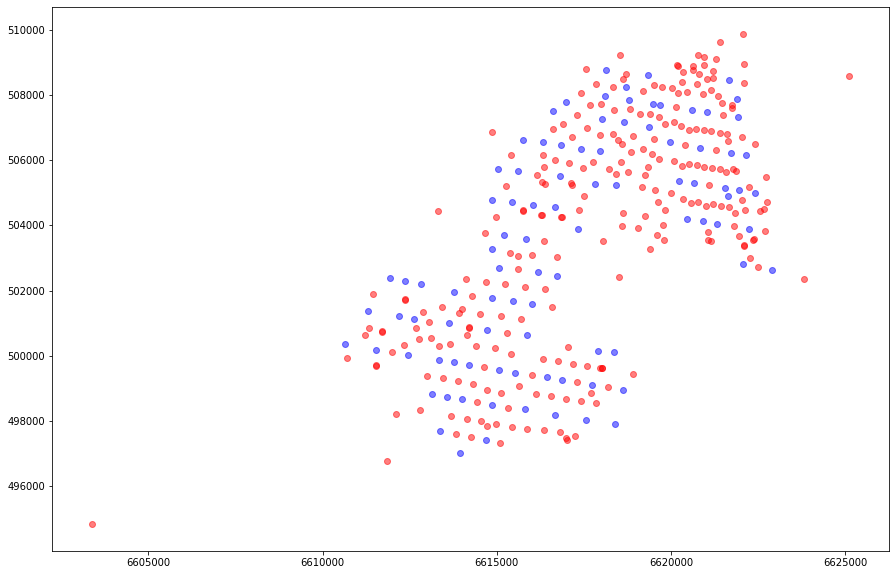

In [117]:
plt.figure(figsize=(15, 10))
plt.scatter(x_water, y_water, color='blue', alpha=0.5)
plt.scatter(x_oil, y_oil, color='red', alpha=0.5)
plt.show()

## statistics ##

In [74]:
df = newest

In [75]:
unique_dates = df.date.unique()

In [99]:
unique_holes = df.num.unique()

In [84]:
print(len(unique_dates))

124


In [85]:
print(df.shape)

(15670, 13)


In [ ]:
water_holes_data = [{} for ]

In [100]:
print(len(water_holes))
print(len(unique_holes))

92
268


In [142]:
timetable_water = {}
for num in water_holes:
    timetable_water[num] = {"work": 0, "no_work": 0} 
for index, row in df.iterrows():
    if row["num"] in water_holes:
        if row["state"] == 1:
            timetable_water[row["num"]]["work"] += 1
        else:
            timetable_water[row["num"]]["no_work"] += 1

In [143]:
print(timetable_water)

{'2069': {'work': 80, 'no_work': 9}, '2583': {'work': 21, 'no_work': 1}, '1887': {'work': 76, 'no_work': 1}, '1289': {'work': 19, 'no_work': 22}, '1528': {'work': 31, 'no_work': 1}, '1949': {'work': 77, 'no_work': 2}, '2524': {'work': 20, 'no_work': 1}, '1591': {'work': 53, 'no_work': 1}, '2180': {'work': 60, 'no_work': 1}, '1531': {'work': 49, 'no_work': 3}, '1832': {'work': 118, 'no_work': 0}, '2003': {'work': 67, 'no_work': 0}, '1822': {'work': 61, 'no_work': 0}, '1472': {'work': 48, 'no_work': 0}, '1939': {'work': 39, 'no_work': 1}, '2010': {'work': 85, 'no_work': 3}, '1975': {'work': 67, 'no_work': 0}, '2463': {'work': 24, 'no_work': 0}, '1914': {'work': 66, 'no_work': 1}, '2096': {'work': 62, 'no_work': 12}, '1831': {'work': 90, 'no_work': 2}, '1650': {'work': 52, 'no_work': 1}, '2079': {'work': 62, 'no_work': 0}, '1689': {'work': 55, 'no_work': 1}, '2011': {'work': 83, 'no_work': 2}, '2004': {'work': 68, 'no_work': 0}, '1715': {'work': 56, 'no_work': 0}, '2092': {'work': 68, 'no

In [144]:
oil_holes = set()
for index, row in df.iterrows():
    if row["type"] == "oil":
        oil_holes.add(row["num"])
    

In [138]:
timetable_water = {}
for num in oil_holes:
    timetable_water[num] = {"work": 0, "no_work": 0} 
for index, row in df.iterrows():
    if row["num"] in oil_holes:
        if row["state"] == 1:
            timetable_water[row["num"]]["work"] += 1
        else:
            timetable_water[row["num"]]["no_work"] += 1

In [140]:
print(timetable_water)

{'10Р': {'work': 65, 'no_work': 4}, '1347': {'work': 19, 'no_work': 1}, '2069': {'work': 80, 'no_work': 9}, '2126': {'work': 73, 'no_work': 2}, '2005': {'work': 77, 'no_work': 0}, '2093': {'work': 75, 'no_work': 1}, '2583': {'work': 21, 'no_work': 1}, '1289': {'work': 19, 'no_work': 22}, '1887': {'work': 76, 'no_work': 1}, '2094': {'work': 74, 'no_work': 6}, '109': {'work': 21, 'no_work': 1}, '1528': {'work': 31, 'no_work': 1}, '101': {'work': 17, 'no_work': 0}, '1741': {'work': 100, 'no_work': 5}, '1711': {'work': 101, 'no_work': 3}, '1978': {'work': 79, 'no_work': 2}, '1590': {'work': 52, 'no_work': 0}, '2524': {'work': 20, 'no_work': 1}, '1889ГС': {'work': 40, 'no_work': 1}, '1591': {'work': 53, 'no_work': 1}, '2180': {'work': 60, 'no_work': 1}, '1949': {'work': 77, 'no_work': 2}, '1531': {'work': 49, 'no_work': 3}, '1918': {'work': 74, 'no_work': 2}, '1409': {'work': 39, 'no_work': 1}, '1832': {'work': 118, 'no_work': 0}, '2099': {'work': 85, 'no_work': 2}, '2003': {'work': 67, 'no

Если вышка на конец месяца i была в работе, а в след месяце пропала - плохой план для нас

In [76]:
print(unique_dates)

['12/1/2016' '11/1/2016' '10/1/2016' '9/1/2016' '8/1/2016' '7/1/2016'
 '6/1/2016' '5/1/2016' '4/1/2016' '3/1/2016' '2/1/2016' '1/1/2016'
 '12/1/2015' '11/1/2015' '10/1/2015' '9/1/2015' '8/1/2015' '7/1/2015'
 '6/1/2015' '5/1/2015' '4/1/2015' '3/1/2015' '2/1/2015' '1/1/2015'
 '12/1/2014' '11/1/2014' '10/1/2014' '9/1/2014' '8/1/2014' '7/1/2014'
 '6/1/2014' '5/1/2014' '4/1/2014' '3/1/2014' '2/1/2014' '1/1/2014'
 '12/1/2013' '11/1/2013' '10/1/2013' '9/1/2013' '8/1/2013' '7/1/2013'
 '6/1/2013' '5/1/2013' '4/1/2013' '3/1/2013' '2/1/2013' '1/1/2013'
 '12/1/2012' '11/1/2012' '10/1/2012' '9/1/2012' '8/1/2012' '7/1/2012'
 '6/1/2012' '5/1/2012' '4/1/2012' '3/1/2012' '2/1/2012' '1/1/2012'
 '12/1/2011' '11/1/2011' '10/1/2011' '9/1/2011' '8/1/2011' '7/1/2011'
 '6/1/2011' '5/1/2011' '4/1/2011' '3/1/2011' '2/1/2011' '1/1/2011'
 '12/1/2010' '11/1/2010' '10/1/2010' '9/1/2010' '8/1/2010' '7/1/2010'
 '6/1/2010' '5/1/2010' '4/1/2010' '3/1/2010' '2/1/2010' '1/1/2010'
 '12/1/2009' '11/1/2009' '10/1/2009' '9/1

In [79]:
holes_states = {}
for index, row in df.iterrows():
    if row['']

SyntaxError: invalid syntax (<ipython-input-79-d94f42c04e21>, line 2)

In [82]:
count_stopped = 0
for index, row in df.iterrows():
    if row['state_end'] == 0:
        count_stopped += 1

In [83]:
print(count_stopped)

52


In [84]:
count_returned = 0
count_unk = 0
stopped_holes = set()
for index, row in df.iterrows():
    if row['state_end'] == 0:
        stopped_holes.add(row["num"])
    elif row["state_end"] == 1:
        if row["num"] in stopped_holes:
            count_returned += 1
    else:
        count_unk += 1

In [85]:
print(count_unk)
print(count_returned)

10164
1125


## fill gaps ##

In [97]:
water_holes = set()
cur_num = 0
for index, row in df.iterrows():
    if row["type"] == "water":
        water_holes.add(row["num"])
print(water_holes)

{'1288', '1472', '1823', '1412', '1859', '1914', '1891', '2011', '1831', '2128', '1287', '1829', '2583', '1954', '2343', '1643', '2344', '1529', '1771', '1870', '1468', '1772', '1711', '1938', '2066', '1442', '2065', '1887', '1642', '1689', '2465', '2141', '2069', '1715', '2010', '2092', '2012', '1834', '1975', '2003', '2139', '2140', '1953', '2183', '1289', '2405', '2079', '1769', '2180', '1381', '1528', '2070', '2002', '1530', '1949', '1717', '1698', '1349', '2006', '1710', '1805', '1350', '1591', '1716', '2345', '2096', '1410', '1408', '1650', '2182', '9', '2064', '102', '1832', '2008', '1167', '2067', '1886', '1924', '2404', '2004', '1531', '2127', '1833', '2524', '1589', '2181', '1948', '2463', '1743', '1822', '1939'}


In [111]:
len(water_holes)

92

In [107]:
df.head()

,num,date,type,state,work_time,oil_weight,water_weight,liquid_weight,income_volume,water_percent,oil_income,liquid_income,state_end,date_start
0,101,12/1/2016,oil,1,744,186.44,241.84,428.28,0,56.5,Jul-83,15.0,1,42232.0
1,102,12/1/2016,water,1,744,0.00,0.00,0.00,2096,0.0,NaN,NaN,-1,NaN
2,103,12/1/2016,oil,1,744,554.09,399.36,953.45,0,41.9,18.6528,32.0,1,42135.0
3,104,12/1/2016,oil,1,744,225.65,351.29,576.94,0,60.9,7.395,17.0,1,42124.0
4,105,12/1/2016,oil,1,744,953.70,284.71,1238.41,0,23.0,32.103,45.0,1,42111.0


In [159]:
print(len(df.num.unique()))

268


In [112]:
print(df.shape)
print(len(df.num.unique()))
print(len(df.date.unique()))

(15670, 14)
268
124


In [99]:
water_holes_ind = dict()
for idx, water_hole in enumerate(water_holes):
    water_holes_ind[water_hole] = idx

In [101]:
print(water_holes_ind)

{'1288': 0, '1472': 1, '1823': 2, '1412': 3, '1859': 4, '1914': 5, '1891': 6, '2011': 7, '1831': 8, '2128': 9, '1287': 10, '1829': 11, '2583': 12, '1954': 13, '2343': 14, '1643': 15, '2344': 16, '1529': 17, '1771': 18, '1870': 19, '1468': 20, '1772': 21, '1711': 22, '1938': 23, '2066': 24, '1442': 25, '2065': 26, '1887': 27, '1642': 28, '1689': 29, '2465': 30, '2141': 31, '2069': 32, '1715': 33, '2010': 34, '2092': 35, '2012': 36, '1834': 37, '1975': 38, '2003': 39, '2139': 40, '2140': 41, '1953': 42, '2183': 43, '1289': 44, '2405': 45, '2079': 46, '1769': 47, '2180': 48, '1381': 49, '1528': 50, '2070': 51, '2002': 52, '1530': 53, '1949': 54, '1717': 55, '1698': 56, '1349': 57, '2006': 58, '1710': 59, '1805': 60, '1350': 61, '1591': 62, '1716': 63, '2345': 64, '2096': 65, '1410': 66, '1408': 67, '1650': 68, '2182': 69, '9': 70, '2064': 71, '102': 72, '1832': 73, '2008': 74, '1167': 75, '2067': 76, '1886': 77, '1924': 78, '2404': 79, '2004': 80, '1531': 81, '2127': 82, '1833': 83, '2524

In [150]:
water_profiles = []
cur_month = '12/1/2016'
cur_profile = np.full(len(water_holes), -1)
for index, row in df.iterrows():
        if row['date'] == cur_month:
            if row['type'] == 'water':
                cur_profile[water_holes_ind[row['num']]] = 1 if row['state'] == 1 else 0
        else:
            cur_month = row['date']
            water_profiles.append(cur_profile)
            cur_profile = np.full(len(water_holes), -1)
water_profiles.append(cur_profile)

In [151]:
print(len(water_profiles))

124


In [152]:
oil_holes = set()
cur_num = 0
for index, row in df.iterrows():
    if row["type"] == "oil":
        oil_holes.add(row["num"])
oil_holes_ind = dict()
for idx, oil_hole in enumerate(oil_holes):
    oil_holes_ind[oil_hole] = idx

In [153]:
print(oil_holes_ind)

{'1562': 0, '2374ГС': 1, '1801': 2, '2080': 3, '7Р': 4, '1440': 5, '1830': 6, '1288': 7, '1472': 8, '1823': 9, '1915': 10, '2152': 11, '1921ГС': 12, '1439': 13, '2122': 14, '1412': 15, '1290': 16, '1379': 17, '1763': 18, '1883': 19, '1978': 20, '1740': 21, '2011': 22, '1891': 23, '1859': 24, '1914': 25, '1831': 26, '2128': 27, '1287': 28, '1792БС': 29, '2583': 30, '1829': 31, '1954': 32, '2343': 33, '1643': 34, '2344': 35, '2123Б': 36, '1499': 37, '2212': 38, '2126': 39, '109': 40, '2034': 41, '1529': 42, '1738': 43, '10Р': 44, '1932ГС': 45, '1438ГС': 46, '1803': 47, '2093': 48, '1863': 49, '1866ГС': 50, '2099': 51, '1771': 52, '17ПО': 53, '2152БС': 54, '1870': 55, '1889ГС': 56, '1468': 57, '1681': 58, '1772': 59, '1711': 60, '1688': 61, '2340': 62, '12Р': 63, '1469': 64, '2062': 65, '1938': 66, '2066': 67, '2036': 68, '1651': 69, '1853': 70, '2123': 71, '1442': 72, '2347': 73, '104': 74, '2063': 75, '2065': 76, '1800БС': 77, '1471': 78, '1228': 79, '1680': 80, '1501': 81, '1855': 82, 

In [160]:
print(oil_holes & water_holes)

{'1288', '1472', '1823', '1412', '1859', '1914', '1891', '2011', '1831', '2128', '1287', '1829', '2583', '1954', '2343', '1643', '2344', '1529', '1771', '1870', '1468', '1772', '1711', '1938', '2066', '1442', '2065', '1887', '1642', '1689', '2465', '2141', '2069', '1715', '2010', '2092', '2012', '1834', '1975', '2003', '2139', '2140', '1953', '2183', '1289', '2405', '2079', '1769', '2180', '1381', '1528', '2070', '2002', '1530', '1949', '1717', '1698', '1349', '2006', '1710', '1805', '1350', '1591', '1716', '2345', '2096', '1410', '1408', '1650', '2182', '9', '2064', '102', '1832', '2008', '1167', '2067', '1886', '1924', '2404', '2004', '1531', '2127', '1833', '2524', '1589', '2181', '1948', '2463', '1743', '1939'}


In [164]:
for index, row in df.iterrows():
    if row['num'] == '1823':
        if row['type'] == 'water':
            print("water")
        if row['type'] == 'oil':
            print("oil")

water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
water
oil
oil
oil
oil
oil
oil


In [157]:
print(len(oil_holes_ind))

267


In [154]:
oil_profiles = []
cur_month = '12/1/2016'
cur_profile = np.full(len(oil_holes), -1)
for index, row in df.iterrows():
        if row['date'] == cur_month:
            if row['type'] == 'oil':
                cur_profile[oil_holes_ind[row['num']]] = 1 if row['state'] == 1 else 0
        else:
            cur_month = row['date']
            oil_profiles.append(cur_profile)
            cur_profile = np.full(len(oil_holes), -1)
oil_profiles.append(cur_profile)

In [156]:
print(len(oil_profiles[0]))

267


In [119]:
cur_month = '12/1/2016'
bad_months = 0
count_water_holes = 0
for index, row in df.iterrows():
    if row['date'] == cur_month:
        if row['type'] == 'water':
            count_water_holes += 1
    else:
        cur_month = row['date']
        print(cur_month)
        if count_water_holes == 0:
            bad_months += 1
        count_water_holes = 0
            


11/1/2016
10/1/2016
9/1/2016
8/1/2016
7/1/2016
6/1/2016
5/1/2016
4/1/2016
3/1/2016
2/1/2016
1/1/2016
12/1/2015
11/1/2015
10/1/2015
9/1/2015
8/1/2015
7/1/2015
6/1/2015
5/1/2015
4/1/2015
3/1/2015
2/1/2015
1/1/2015
12/1/2014
11/1/2014
10/1/2014
9/1/2014
8/1/2014
7/1/2014
6/1/2014
5/1/2014
4/1/2014
3/1/2014
2/1/2014
1/1/2014
12/1/2013
11/1/2013
10/1/2013
9/1/2013
8/1/2013
7/1/2013
6/1/2013
5/1/2013
4/1/2013
3/1/2013
2/1/2013
1/1/2013
12/1/2012
11/1/2012
10/1/2012
9/1/2012
8/1/2012
7/1/2012
6/1/2012
5/1/2012
4/1/2012
3/1/2012
2/1/2012
1/1/2012
12/1/2011
11/1/2011
10/1/2011
9/1/2011
8/1/2011
7/1/2011
6/1/2011
5/1/2011
4/1/2011
3/1/2011
2/1/2011
1/1/2011
12/1/2010
11/1/2010
10/1/2010
9/1/2010
8/1/2010
7/1/2010
6/1/2010
5/1/2010
4/1/2010
3/1/2010
2/1/2010
1/1/2010
12/1/2009
11/1/2009
10/1/2009
9/1/2009
8/1/2009
7/1/2009
6/1/2009
5/1/2009
4/1/2009
3/1/2009
2/1/2009
1/1/2009
12/1/2008
11/1/2008
10/1/2008
9/1/2008
8/1/2008
7/1/2008
6/1/2008
5/1/2008
4/1/2008
3/1/2008
2/1/2008
1/1/2008
12/1/2007
1

In [120]:
print(bad_months)
print(count_water_holes)

23
0


In [132]:
print(profiles[0][40:60])
print(profiles[1][40:60])

[ 1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  0  1  1]
[ 1 -1  1  1 -1  1  1  1  1  1  1  1  1  1  1 -1  1  0  1  1]


In [145]:
profiles = reversed(profiles)

In [141]:
for pr in profiles :
    for p in pr :
        if p == 1:
            print(1, end='')
        if p == 0:
            print(0, end='')
        if p == -1:
            print('-', end='')
    print('\n')

11111110111111111111111111111101111111111-11-1111111111-101111111100111111111111111111111111

1111111-111111111111111111111101111111111-11-1111111111-1011111111001111-1111111111111111111

1111111-111111111111111111111101111111111011-1111111111-1011111111001111-1111111111111111111

1111111-111111111101111111111111111111111011-1111111110-1011111111001111-1011111111111111111

1111110-011111111111111111111111111111111011-1101111111-1011111111001111-1111111111111111111

1111110-10111111111111111111111111111111101111111111111-1011111111001111-1011111111111111111

1111110-1011111111111111111111111111111110110011111111111011111111001111-1-11111101111111111

1111110-1011111111111111111111111111111110110-11111111101011111111001111-1-111111-1111111111

1111110-100111111111-111111111111111111110110-11111111101011111111001111-1-111111-1111111111

1111110-10-111111111-111111111111111111110110-11111111101011111111001111-1-111111-1111111111

0111110-10-111111111-111111111111111111110110-11111111101011

-------------1-------1---------------------------------------------------1---------1--------

-------------1-------1---------------------------------------------------1---------1--------

-------------1-------1---------------------------------------------------1------------------

-------------1-------1---------------------------------------------------1------------------

-------------1-----------------------------------------------------------1------------------

-------------1-----------------------------------------------------------1------------------

-------------1-----------------------------------------------------------1------------------

-------------1-----------------------------------------------------------1------------------

-------------------------------------------------------------------------1------------------

--------------------------------------------------------------------------------------------



In [182]:
good_1 = []
idx_good1 = 0
idx_good2 = 0
good_2 = []
for idx1, profile1 in enumerate(water_profiles):
    num_different = 0
    for idx2, profile2 in enumerate(water_profiles):
        if not idx1 == idx2:
            for el1, el2 in zip(profile1, profile2):
                if not el1 == el2:
                    num_different += 1
            if num_different == 1:
                good_1 = profile1
                good_idx1 = idx1
                good_idx2 = idx2
                good_2 = profile2
                


In [183]:
print(good_1)
print(good_2)
print(good_idx1, good_idx2)

[ 1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1 -1  1  0  1  1  1  1  1  1  1  1  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
[ 1  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  0  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1
  1  1  1  1  1  1  1 -1  1  0  1  1  1  1  1  1  1  1  0  0  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
1 0


In [191]:
cur_month = '12/1/2016'
prev_month = '11/1/2016'
new_oil_values = np.full(len(oil_holes), -1, dtype=float)
old_oil_values = np.full(len(oil_holes), -1, dtype=float)
for idx, row in df.iterrows():
    if row['date'] == cur_month:
        if row['type'] == 'oil':
            if not row['work_time'] == 0:
                new_oil_values[oil_holes_ind[row['num']]] = row['oil_weight'] / row['work_time']
    elif row['date'] == prev_month:
        if row['type'] == 'oil':
            if not row['work_time'] == 0:
                old_oil_values[oil_holes_ind[row['num']]] = row['oil_weight'] / row['work_time']
        

In [192]:
print(new_oil_values)
print(old_oil_values)

[ 1.83790323  0.89701613  0.35912463  0.11983871 -1.          1.31620968
  0.48263441 -1.         -1.         -1.          0.44417227 -1.
  1.4694086   0.63092742  0.13947581 -1.          1.11409946  0.72489247
  0.55765814  0.67291667  0.22715054  0.77458333 -1.         -1.
 -1.         -1.         -1.         -1.         -1.          1.53177419
 -1.         -1.         -1.         -1.         -1.         -1.
  0.47084677  0.56215054  0.42336022  0.42686828  0.24986559  0.29995968
 -1.          0.62115591 -1.          1.10416667  0.77388441  0.47586022
  0.82762097  0.42182796  0.88198925  0.68604307 -1.         -1.
  0.51193548 -1.          0.37719086 -1.          1.19913978 -1.
 -1.          1.10143817  0.41774194 -1.          0.52508065  0.56709852
 -1.         -1.          0.72819892  0.71229839  0.32250336  0.3186828
 -1.         -1.          0.30329301  0.23200269 -1.          0.19217742
  0.41521505  1.13524194  1.19946237  2.46185484  0.25709677  0.06767473
  0.83994624  0.801

In [196]:
changed = 0
for val1, val2 in zip(new_oil_values, old_oil_values):
    if not (val1 == -1 and val2 == -1) and not val1 == val2:
        changed += 1
print(changed)
print(len(new_oil_values))
print(len([val for val in new_oil_values if not val == -1]))
print(len([val for val in old_oil_values if not val == -1]))

164
267
163
162


In [201]:
print(np.average([val for val in new_oil_values if not val == -1]))
print(np.average([val for val in old_oil_values if not val == -1]))
print(*[abs(val1 - val2) / 0.6783631266785791 for val1, val2 in zip(new_oil_values, old_oil_values)], sep="\n")

0.6783631266785791
0.7036168902552155
0.08994215407749347
0.0005014296403346843
0.022767769586691838
0.0014411139518959095
0.0
0.06347175715813655
0.055007359171198866
0.0
0.0
0.0
0.2125950079751862
0.0
0.1416313846995058
0.24861653065588427
0.0499515721401433
0.0
0.019822251621563567
0.13390720119644245
0.12809866791574154
0.07149563131101637
0.05773371957148596
0.3902162763907965
1.7571095574864657
0.0
0.0
0.0
0.0
0.0
0.0
0.2727820006993611
0.0
0.0
0.0
0.0
0.0
0.0
0.019410127375008936
0.06148708831054392
0.036998057961162976
0.007155375139706897
0.027093866933376114
0.059577711392610366
0.0
0.1769098729655116
0.0
0.2057853924132375
0.09734057684978428
0.0792744764647425
0.009383091619883282
0.008033780985729612
0.08009013903604902
0.10564439880978911
0.0
0.0
0.02251426833463793
0.0
0.06429402428467677
0.0
0.050283120812853105
0.0
0.0
0.08528396127147991
2.0899454580107553
0.0
0.08984440666004138
0.03914842627565834
0.0
0.0
0.0017878531016418354
0.1231617459897124
0.006884264814160322

In [165]:
print(water_profiles)

[array([ 1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1]), array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1]), array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,
        1,  1,  1,  1,  1